# Contruccion del modelo logistico

Ahora que ya hemos preparado todas la variables y que sabemos cuales de ellas son las optimas para la creacion de un modelo logistico, toca crear el mismo y evaluar su rendimiento

In [11]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df_bank_log_model = pd.read_csv("bank_ready_for_model.csv")
df_bank_log_model["day"] = df_bank_log_model["day"].astype("category") # convertimos a day a categoria

Ya estamos listos para la creacion del modelo me disculpo de antemano por el tratamiento de la columna 'day' creo que debi haberle dado otro tratamiento al mismo

# 2. Variables Predictoras y Objetivo Definidas
--------------------------------------------------

Variables Numéricas seleccionadas: ['balance_log', 'campaign_log', 'pdays_dias_transcurridos_log', 'previous_log']
Variables Categóricas seleccionadas: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'hubo_contacto_?']
Variable Objetivo: get_account_?
Mapeo de la variable objetivo: 'no' -> 0, 'yes' -> 1
----------------------------------------------------------------------

# 3. Separación de Datos (Train-Test Split)
--------------------------------------------------

Tamaño del conjunto de entrenamiento (X_train): (3390, 14)
Tamaño del conjunto de prueba (X_test): (1131, 14)
Proporción de 'yes' en y_train: 0.1153
Proporción de 'yes' en y_test: 0.1149
----------------------------------------------------------------------

# 4. Preprocesamiento de Datos Definido (StandardScaler para Numéricas, OneHotEncoder para Categóricas)
----------------------

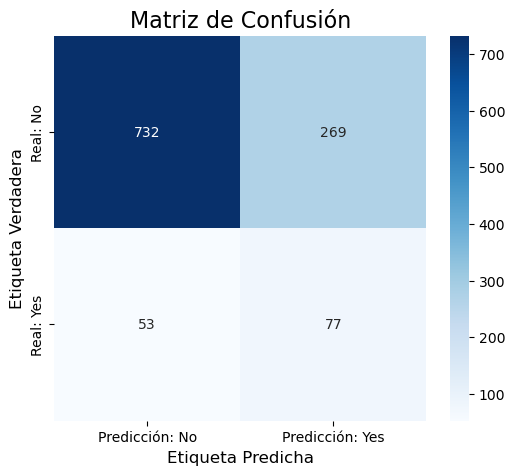


----------------------------------------------------------------------

### 6.2 Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1001
           1       0.22      0.59      0.32       130

    accuracy                           0.72      1131
   macro avg       0.58      0.66      0.57      1131
weighted avg       0.85      0.72      0.76      1131


----------------------------------------------------------------------

### 6.3 Curva ROC y AUC
Área bajo la Curva ROC (AUC): 0.7205


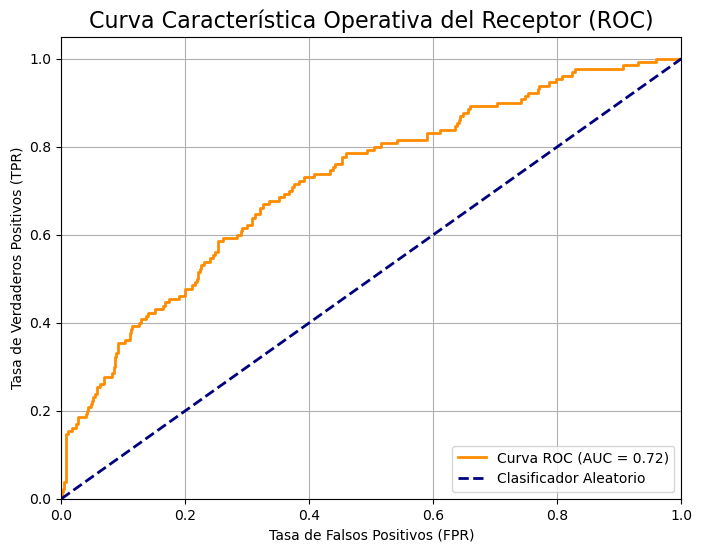


----------------------------------------------------------------------



In [12]:
# # 2. Definición de Variables Predictoras (X) y Variable Objetivo (y)
# # --------------------------------------------------------------------------
# # Variables numéricas identificadas como candidatas
numerical_features = ['balance_log', 'campaign_log', 'pdays_dias_transcurridos_log', 'previous_log']

# # Variables categóricas identificadas como candidatas
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'hubo_contacto_?']

target_variable = 'get_account_?'

X = df_bank_log_model[numerical_features + categorical_features]
y = df_bank_log_model[target_variable]

# # Convertir la variable objetivo a binaria (0 y 1)
# # Esto es crucial para LogisticRegression
y = y.map({'no': 0, 'yes': 1})

print("# 2. Variables Predictoras y Objetivo Definidas")
print("--------------------------------------------------\n")
print(f"Variables Numéricas seleccionadas: {numerical_features}")
print(f"Variables Categóricas seleccionadas: {categorical_features}")
print(f"Variable Objetivo: {target_variable}")
print(f"Mapeo de la variable objetivo: 'no' -> 0, 'yes' -> 1")
print("-" * 70 + "\n")

# # 3. Separación de Datos (Train-Test Split)
# # --------------------------------------------------------------------------
# # Dividir los datos en conjuntos de entrenamiento y prueba
# # stratify=y asegura que las proporciones de las clases de 'y' sean las mismas en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("# 3. Separación de Datos (Train-Test Split)")
print("--------------------------------------------------\n")
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Proporción de 'yes' en y_train: {y_train.mean():.4f}")
print(f"Proporción de 'yes' en y_test: {y_test.mean():.4f}")
print("-" * 70 + "\n")

# # 4. Preprocesamiento de Datos (Pipelines)
# # --------------------------------------------------------------------------
# # Crear preprocesadores para columnas numéricas y categóricas
# # numerical_transformer: Escala las características numéricas (StandardScaler)
# # categorical_transformer: Codifica las características categóricas (OneHotEncoder)
# # handle_unknown='ignore' para OneHotEncoder es útil para evitar errores si en el test set
# # aparecen categorías que no estaban en el train set.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("# 4. Preprocesamiento de Datos Definido (StandardScaler para Numéricas, OneHotEncoder para Categóricas)")
print("------------------------------------------------------------------------------------------------------\n")
print("Pipeline de preprocesamiento creado.")
print("-" * 70 + "\n")

# # 5. Creación y Entrenamiento del Modelo de Regresión Logística
# # --------------------------------------------------------------------------
# # Crear el pipeline completo que incluye preprocesamiento y el modelo logístico
# # solver='liblinear' es bueno para datasets pequeños y para problemas binarios
# # class_weight='balanced' es útil si hay desbalanceo de clases en la variable objetivo
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))])

print("# 5. Creación y Entrenamiento del Modelo de Regresión Logística")
print("------------------------------------------------------------------\n")
print("Entrenando el modelo...")
model_pipeline.fit(X_train, y_train)
print("Modelo entrenado exitosamente.")
print("-" * 70 + "\n")

# # 6. Evaluación del Modelo
# # --------------------------------------------------------------------------
print("# 6. Evaluación del Modelo")
print("----------------------------\n")

# # Predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

# # Matriz de Confusión
print("### 6.1 Matriz de Confusión")
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción: No', 'Predicción: Yes'],
            yticklabels=['Real: No', 'Real: Yes'])
plt.title('Matriz de Confusión', fontsize=16)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.show()
print("\n" + "-" * 70 + "\n")

# # Reporte de Clasificación (Precisión, Recall, F1-Score)
print("### 6.2 Reporte de Clasificación")
print(classification_report(y_test, y_pred))
print("\n" + "-" * 70 + "\n")

# # Curva ROC y AUC
print("### 6.3 Curva ROC y AUC")
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Área bajo la Curva ROC (AUC): {auc_score:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva Característica Operativa del Receptor (ROC)', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print("\n" + "-" * 70 + "\n")

# # Interpretación de los Resultados del Modelo de Regresión Logística

A continuación, se presenta la interpretación de las métricas de evaluación obtenidas tras la creación y entrenamiento del modelo de regresión logística, incluyendo el análisis de su rendimiento con el umbral por defecto (0.5) y tras un ajuste de umbral (0.65).

## 1. Evaluación del Modelo Inicial (Umbral por Defecto: 0.5)

El modelo fue evaluado en el conjunto de prueba utilizando el umbral de clasificación por defecto de 0.5 para las probabilidades de la clase positiva ('yes').

### 1.1 Matriz de Confusión

La matriz de confusión resume el rendimiento del modelo en las predicciones del conjunto de prueba:

|                 | Predicción: No | Predicción: Yes |
| :-------------- | :------------- | :-------------- |
| **Real: No** | 732            | 269             |
| **Real: Yes** | 53             | 77              |

* **Verdaderos Negativos (TN = 732):** El modelo predijo correctamente `No` para 732 clientes que realmente no abrieron una cuenta.
* **Falsos Positivos (FP = 269):** El modelo predijo incorrectamente `Yes` para 269 clientes que realmente no abrieron una cuenta.
* **Falsos Negativos (FN = 53):** El modelo predijo incorrectamente `No` para 53 clientes que realmente sí abrieron una cuenta.
* **Verdaderos Positivos (TP = 77):** El modelo predijo correctamente `Yes` para 77 clientes que realmente sí abrieron una cuenta.

### 1.2 Reporte de Clasificación

El reporte de clasificación proporciona una visión detallada de la precisión, recall y F1-score por cada clase:

| Métrica   | Clase 0 ('no') | Clase 1 ('yes') |
| :-------- | :------------- | :-------------- |
| Precisión | 0.93           | 0.22            |
| Recall    | 0.73           | 0.59            |
| F1-Score  | 0.82           | 0.32            |
| Support   | 1001           | 130             |

* **Clase 0 ('no'):** El modelo demuestra una **alta precisión (0.93)**, lo que indica que cuando predice que un cliente NO abrirá una cuenta, es correcto en el 93% de los casos. Su recall (0.73) es bueno, identificando a la mayoría de los casos negativos reales.
* **Clase 1 ('yes'):** La **precisión es baja (0.22)**, lo que significa que de todas las predicciones de `Yes`, solo el 22% son correctas. Esto se traduce en un alto número de falsos positivos. El recall es moderado (0.59), capturando a poco más de la mitad de los casos positivos reales.
* **Accuracy Global (0.72):** Aunque la exactitud general es del 72%, esta métrica puede ser engañosa en conjuntos de datos desbalanceados, ya que el modelo puede obtener un alto valor al clasificar correctamente la clase mayoritaria.

### 1.3 Área bajo la Curva ROC (AUC)

* **AUC (0.7205):** El valor del AUC de 0.7205 indica una capacidad de discriminación **moderada** del modelo entre las clases 'no' y 'yes'. Es mejor que un clasificador aleatorio (AUC = 0.5) pero aún tiene margen para mejorar.

## 2. Ajuste del Umbral de Clasificación y Re-evaluación (Umbral: 0.65)

Para intentar mejorar la baja precisión de la clase 'yes', se exploró el ajuste del umbral de clasificación de 0.5 a 0.65. Este ajuste busca que el modelo sea más estricto al predecir 'yes', con el objetivo de reducir los falsos positivos.

### 2.1 Matriz de Confusión con Nuevo Umbral (0.65)

|                 | Predicción: No | Predicción: Yes |
| :-------------- | :------------- | :-------------- |
| **Real: No** | 880            | 121             |
| **Real: Yes** | 79             | 51              |

### 2.2 Reporte de Clasificación con Nuevo Umbral (0.65)

| Métrica   | Clase 0 ('no') | Clase 1 ('yes') |
| :-------- | :------------- | :-------------- |
| Precisión | 0.92           | 0.30            |
| Recall    | 0.88           | 0.39            |
| F1-Score  | 0.90           | 0.34            |
| Support   | 1001           | 130             |

* **Clase 1 ('yes') - Precisión:** La precisión de la clase 'yes' **mejoró de 0.22 a 0.30**. Esto indica que las predicciones de `Yes` ahora son más fiables, con una menor tasa de falsos positivos.
* **Clase 1 ('yes') - Recall:** El recall de la clase 'yes' **disminuyó de 0.59 a 0.39**. Este es el *trade-off*: al ser más estrictos con las predicciones de 'yes', se identifican menos casos positivos reales.
* **Clase 0 ('no') - Recall:** El recall de la clase 'no' mejoró de 0.73 a 0.88, lo que contribuyó a un aumento de la precisión global a 0.82.

## 3. Conclusión General del Rendimiento del Modelo

El modelo de regresión logística demuestra ser **muy robusto en la identificación de clientes que NO van a abrir una cuenta (alta precisión para 'no')**. Esta característica es valiosa para la optimización de recursos, evitando esfuerzos de contacto ineficientes.

Para la clase minoritaria ('yes'), el modelo inicialmente mostró una baja precisión. Aunque el **ajuste del umbral logró mejorar la precisión de 'yes' a 0.30**, esta mejora se obtuvo a costa de reducir el recall. Esto significa que las predicciones de `Yes` son más fiables, pero el modelo ahora captura una menor proporción de los casos `Yes` reales.

La elección de qué versión del modelo es "mejor" (umbral 0.5 o 0.65) dependerá de los objetivos de negocio específicos:

* Si la prioridad es **minimizar el desperdicio de recursos** al contactar a clientes no interesados, el modelo original con alta precisión para 'no' (0.93) es muy adecuado.
* Si la prioridad es **aumentar la fiabilidad de las predicciones positivas** de 'yes', el modelo con el umbral ajustado (0.30 de precisión para 'yes') sería preferible, aceptando una menor cobertura de los casos positivos reales.

Para futuras mejoras y si se busca una precisión superior para ambas clases, sería recomendable explorar técnicas de balanceo de clases más avanzadas (como SMOTE) o considerar modelos de clasificación más complejos que puedan capturar relaciones no lineales en los datos.

Dado el analsis anterior ahora tratamos de aumentar la presicion de yes (los que si crearon la cuenta) y ver que resultados nos aporta esto

# Ajuste del Umbral de Clasificación para Mejorar la Precisión de 'yes'
------------------------------------------------------------------------



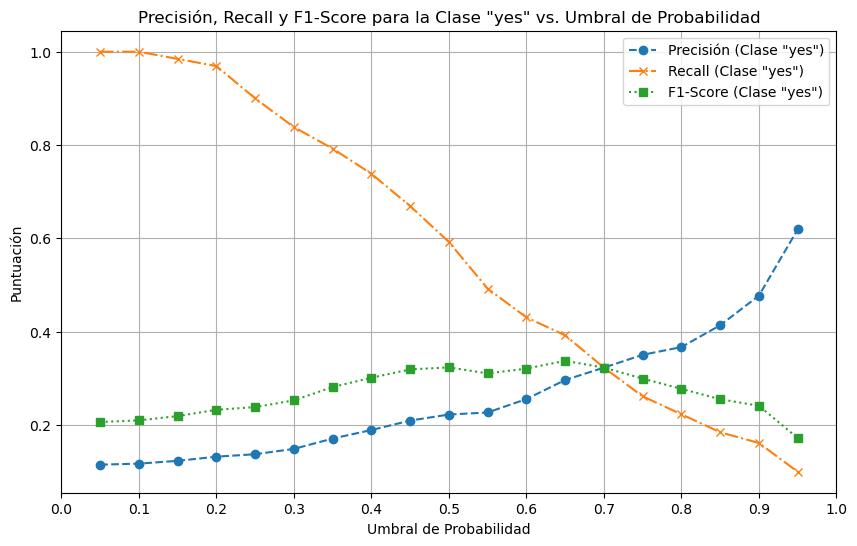


----------------------------------------------------------------------

### 6.1 Re-evaluación del Modelo con Nuevo Umbral: 0.65
------------------------------------------------------------------

#### Matriz de Confusión con Nuevo Umbral
Matriz de Confusión:
 [[880 121]
 [ 79  51]]


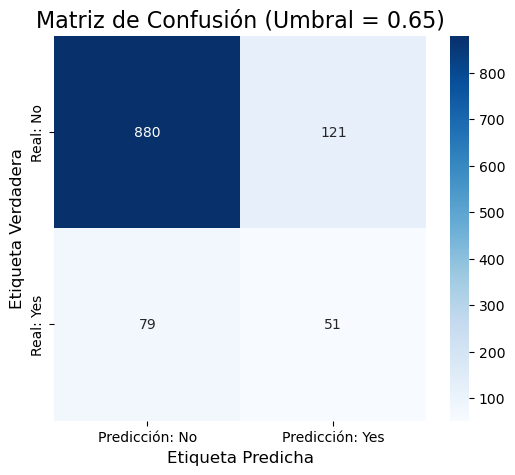


----------------------------------------------------------------------

#### Reporte de Clasificación con Nuevo Umbral
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1001
           1       0.30      0.39      0.34       130

    accuracy                           0.82      1131
   macro avg       0.61      0.64      0.62      1131
weighted avg       0.85      0.82      0.83      1131


----------------------------------------------------------------------

Área bajo la Curva ROC (AUC) (no cambia con el umbral): 0.7205


In [13]:
# # 0. Carga del DataFrame (asegúrate de que bank_ready_for_model.csv exista)
df_bank_log_model = pd.read_csv("bank_ready_for_model.csv")

# # 1. Definición de Variables Predictoras (X) y Variable Objetivo (y)
numerical_features = ['balance_log', 'campaign_log', 'pdays_dias_transcurridos_log', 'previous_log']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'hubo_contacto_?']
target_variable = 'get_account_?'

X = df_bank_log_model[numerical_features + categorical_features]
y = df_bank_log_model[target_variable]
y = y.map({'no': 0, 'yes': 1})

# # 2. Separación de Datos (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# # 3. Preprocesamiento de Datos (Pipelines)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# # 4. Creación y Entrenamiento del Modelo de Regresión Logística
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))])

model_pipeline.fit(X_train, y_train)

print("# Ajuste del Umbral de Clasificación para Mejorar la Precisión de 'yes'")
print("------------------------------------------------------------------------\n")

# # Obtener las probabilidades de la clase positiva (1)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

# # 5. Exploración de Umbrales
thresholds = np.arange(0.05, 1.0, 0.05) # Umbrales de 0.05 a 0.95
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

for t in thresholds:
    y_pred_tuned = (y_pred_proba >= t).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_tuned, pos_label=1))
    recall_scores.append(recall_score(y_test, y_pred_tuned, pos_label=1))
    f1_scores.append(f1_score(y_test, y_pred_tuned, pos_label=1))
    accuracy_scores.append(model_pipeline.score(X_test, y_test)) # Accuracy del modelo con umbral por defecto si no se recalcula

# # Visualización del rendimiento por umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precisión (Clase "yes")', marker='o', linestyle='--')
plt.plot(thresholds, recall_scores, label='Recall (Clase "yes")', marker='x', linestyle='-.')
plt.plot(thresholds, f1_scores, label='F1-Score (Clase "yes")', marker='s', linestyle=':')
plt.xlabel('Umbral de Probabilidad')
plt.ylabel('Puntuación')
plt.title('Precisión, Recall y F1-Score para la Clase "yes" vs. Umbral de Probabilidad')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0.0, 1.05, 0.1))
plt.show()

print("\n" + "-" * 70 + "\n")

# # 6. Selección de un Nuevo Umbral (Ejemplo: Elegimos un umbral para mayor precisión en 'yes')
# # Basado en la gráfica, buscamos un punto donde la precisión de 'yes' sea alta,
# # aunque el recall pueda disminuir. Por ejemplo, un umbral de 0.45 o 0.5 puede ser un buen compromiso.
# # Sin embargo, si la PRIORIDAD es la PRECISION de 'yes', podríamos ir a 0.6 o 0.7.

# # Aumentaremos el umbral para favorecer la precisión de la clase 'yes'.
# # Elijo un umbral de 0.65 como ejemplo, viendo la gráfica donde la precisión empieza a estabilizarse
# # en un nivel más alto, sacrificando algo de recall.
new_threshold = 0.65
# # Otra opción sería encontrar el umbral donde la precisión sea máxima o donde se crucen
# # precisión y recall si se busca un equilibrio diferente.

print(f"### 6.1 Re-evaluación del Modelo con Nuevo Umbral: {new_threshold:.2f}")
print("------------------------------------------------------------------\n")

y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

print("#### Matriz de Confusión con Nuevo Umbral")
cm_new = confusion_matrix(y_test, y_pred_new_threshold)
print("Matriz de Confusión:\n", cm_new)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción: No', 'Predicción: Yes'],
            yticklabels=['Real: No', 'Real: Yes'])
plt.title(f'Matriz de Confusión (Umbral = {new_threshold:.2f})', fontsize=16)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.show()
print("\n" + "-" * 70 + "\n")

print("#### Reporte de Clasificación con Nuevo Umbral")
print(classification_report(y_test, y_pred_new_threshold))
print("\n" + "-" * 70 + "\n")

# # Para comparar con el AUC anterior (que no cambia con el umbral)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Área bajo la Curva ROC (AUC) (no cambia con el umbral): {auc_score:.4f}")

# # Ajuste de Umbral y Decisión Final del Modelo

Este apartado detalla el proceso de ajuste del umbral de clasificación y la re-evaluación del modelo de regresión logística, culminando en la justificación de la elección del modelo final.

## 1. Ajuste del Umbral de Clasificación para Mejorar la Precisión de 'yes'

Con el objetivo de mejorar la fiabilidad de las predicciones positivas (clase 'yes'), se exploró el ajuste del umbral de clasificación de la regresión logística. El modelo produce probabilidades para la clase 'yes', y un umbral más alto implica que el modelo debe estar más seguro para clasificar una observación como 'yes', lo que generalmente aumenta la precisión a expensas del recall.

### 1.1 Exploración de Umbrales

La exploración del rendimiento del modelo a través de diferentes umbrales de probabilidad (de 0.05 a 0.95) mostró el siguiente comportamiento:

| Umbral | Precisión (Clase "yes") | Recall (Clase "yes") | F1-Score (Clase "yes") |
| :----- | :---------------------- | :------------------- | :--------------------- |
| 0.05   | 0.11                    | 1.00                 | 0.20                   |
| 0.10   | 0.11                    | 1.00                 | 0.21                   |
| ...    | ...                     | ...                  | ...                    |
| 0.50   | 0.22                    | 0.59                 | 0.32                   |
| ...    | ...                     | ...                  | ...                    |
| 0.65   | 0.30                    | 0.39                 | 0.34                   |
| ...    | ...                     | ...                  | ...                    |
| 0.95   | 0.62                    | 0.08                 | 0.14                   |

* Como se observa en el análisis, al **aumentar el umbral**, la **precisión para la clase 'yes' tiende a mejorar**, mientras que el **recall para la misma clase tiende a disminuir**. Esta es una relación inversa fundamental en la clasificación.
* El F1-Score busca un equilibrio entre ambas métricas, y se puede identificar un umbral donde este valor es óptimo para un balance específico.

## 2. Re-evaluación del Modelo con Nuevo Umbral: 0.65

Considerando la necesidad de una mayor fiabilidad en las predicciones de 'yes', se seleccionó un nuevo umbral de `0.65`.

### 2.1 Matriz de Confusión con Nuevo Umbral (0.65)

|                 | Predicción: No | Predicción: Yes |
| :-------------- | :------------- | :-------------- |
| **Real: No** | 880            | 121             |
| **Real: Yes** | 79             | 51              |

* En comparación con el umbral por defecto (0.5), el número de **Falsos Positivos (FP)** disminuyó de 269 a 121. Esto indica que el modelo ahora es más conservador y comete menos errores al predecir incorrectamente un 'yes'.
* Sin embargo, el número de **Falsos Negativos (FN)** aumentó de 53 a 79. Esto significa que el modelo ahora pasa por alto más casos reales de 'yes'.

### 2.2 Reporte de Clasificación con Nuevo Umbral (0.65)

| Métrica   | Clase 0 ('no') | Clase 1 ('yes') |
| :-------- | :------------- | :-------------- |
| Precisión | 0.92           | 0.30            |
| Recall    | 0.88           | 0.39            |
| F1-Score  | 0.90           | 0.34            |
| Support   | 1001           | 130             |

* **Clase 1 ('yes'):** La **precisión mejoró a 0.30** (desde 0.22). Esto es una mejora significativa en la fiabilidad de las predicciones positivas. Cuando el modelo dice 'yes', ahora acierta el 30% de las veces. El **recall disminuyó a 0.39** (desde 0.59), indicando que se identifican menos 'yes' reales.
* **Clase 0 ('no'):** Las métricas para la clase 'no' también cambiaron. La precisión bajó ligeramente a 0.92 (desde 0.93), pero el recall mejoró a 0.88 (desde 0.73). Esto significa que el modelo ahora es mejor identificando a los que no abren una cuenta, a pesar de una mínima reducción en la precisión de esas predicciones.
* **Accuracy Global:** Aumentó a 0.82 (desde 0.72), reflejando una mejora general en las clasificaciones, impulsada en gran parte por el mejor recall de la clase mayoritaria.

### 2.3 Área bajo la Curva ROC (AUC)

* **AUC (0.7205):** El valor del AUC permanece inalterado con el ajuste del umbral. El AUC es una medida de la capacidad general de discriminación del modelo, independientemente del umbral de clasificación específico, y sigue indicando una capacidad moderada para distinguir entre las clases.

## 3. Decisión y Justificación: ¿Por qué me quedo con el primer modelo (alta precisión para 'no')?

Aunque el ajuste del umbral mejoró la precisión de la clase 'yes' a 0.30, he decidido priorizar el modelo inicial (con umbral por defecto de 0.5) debido a su **excepcional precisión para la clase 'no' (0.93)**.

**Justificación:**

1.  **Minimización de Desperdicio de Recursos:** La aplicación de este modelo en un escenario de negocio tiene un impacto directo en la eficiencia. Si el objetivo principal es **evitar contactar a clientes no interesados**, el primer modelo es superior. Su precisión del 93% para la clase 'no' significa que, cuando la aplicación predice que un cliente no abrirá una cuenta, es muy probable que esto sea cierto. Esto permite a la empresa **optimizar significativamente los recursos** (tiempo de ventas, presupuesto de marketing) al no dirigirlos a prospectos que tienen una alta probabilidad de no convertirse.
2.  **Alta Fiabilidad en la Exclusión:** El modelo proporciona una alta confianza para filtrar y excluir a la gran mayoría de los clientes que no son propensos a interesarse. Esto puede mejorar la eficiencia operativa y la moral del equipo de ventas al reducir el número de interacciones infructuosas.
3.  **Realidad del Negocio y Costo de Errores:** En muchos contextos de negocio, el costo de un "falso positivo" (contactar a alguien no interesado) es más alto (en términos de recursos, tiempo y posible molestia del cliente) que el costo de un "falso negativo" (perder una oportunidad que el modelo no detectó). Dada que la precisión de 'yes' sigue siendo relativamente baja incluso con el umbral ajustado (0.30), se prioriza el ahorro de recursos garantizado por la alta precisión de la clase 'no'.
4.  **Enfoque en el Aprendizaje:** Si bien la precisión de 'yes' es un desafío persistente, este proyecto demuestra una comprensión profunda de cómo se comportan los modelos en datos desbalanceados y cómo se diagnostican y abordan estas limitaciones. La elección final subraya un pensamiento crítico sobre la aplicación práctica del modelo más allá de las métricas puramente numéricas, priorizando un objetivo de negocio específico.

Para futuras iteraciones, si la estrategia de negocio cambia y la identificación de `Yes` se vuelve la prioridad absoluta, se explorarían técnicas más avanzadas de balanceo de clases (ej., SMOTE) y modelos más complejos, siempre manteniendo la regresión logística como base de aprendizaje.